In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import layers, callbacks
from keras.models import Sequential
import keras_tuner as kt
import pickle
from modules.train_cnn import *
from modules.process_data import *
from modules.validate import *
import os

os.environ[
    "TF_CPP_MIN_LOG_LEVEL"
] = "3"  # this is to silence some of TF warning messages
import typer
from typing_extensions import Annotated


2024-01-14 09:54:20.188486: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-14 09:54:20.454814: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-14 09:54:20.456999: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-14 09:54:23.788601: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
Dprime_model = tf.keras.models.load_model("./results/Dprime_model_trying_to_get_three_outputs")
Dprime_model_with_Linh_mod = tf.keras.models.load_model('./results/Dprime_model_with_Linh_mods')

test_dprime_tensor = np.array(pickle.load(open('./processed_LD_data/test_data_Dprime_labeled_tensors', "rb")))
test_dprime_label = np.array(pickle.load(open('./processed_LD_data/test_data_Dprime_labeled_labels', 'rb')))

train_Dprime_tensors = np.array(pickle.load(open('./processed_LD_data/train_data_Dprime_labeled_tensors', 'rb')))
train_Dprime_labels = np.array(pickle.load(open('./processed_LD_data/train_data_Dprime_labeled_labels', 'rb')))

test_dprime_scrambled_tensors = np.array(pickle.load(open('./processed_LD_data/test_data_Dprime_scrambled_tensors', 'rb')))
test_dprime_free_scrambled_tensors = np.array(pickle.load(open('./processed_LD_data/test_data_Dprime_labeled_free_scrambled_tensors', 'rb')))

In [4]:
pwd

'/mnt/c/users/prasa/OneDrive/dfenn-main'

In [7]:
train_Dprime_tensors.shape

(2423, 20, 300, 2)

8/8 [==============================] - 0s 36ms/step


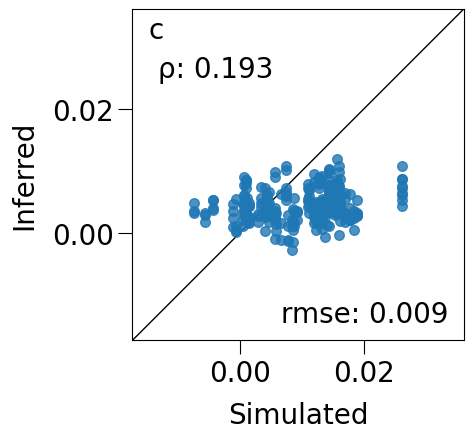

In [3]:
plot_LD_results(Dprime_model, test_dprime_tensor, test_dprime_label, "results/plots/Linh_func_dprime_no_scramble")

8/8 [==============================] - 0s 31ms/step


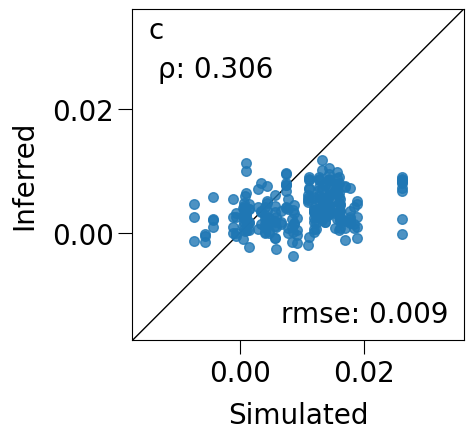

In [4]:
plot_LD_results(Dprime_model, test_dprime_scrambled_tensors, test_dprime_label, "results/plots/Linh_func_dprime_scrambled_tensors")

8/8 [==============================] - 0s 34ms/step


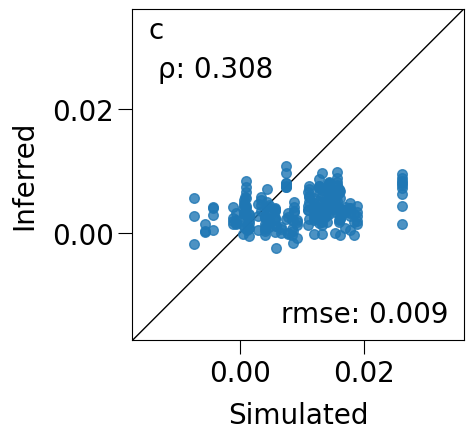

In [5]:
plot_LD_results(Dprime_model, test_dprime_free_scrambled_tensors, test_dprime_label, "results/plots/Linh_func_dprime_free_scrambled_tensors")

8/8 [==============================] - 0s 32ms/step


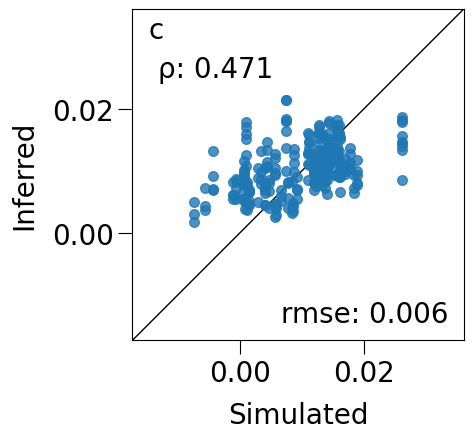

In [6]:
plot_LD_results(Dprime_model_with_Linh_mod, test_dprime_tensor, test_dprime_label, "./results/plots/Linh_mod_Dprime_model")
# So removing model.add(layers.Dropout(0.2)) didn't really do much as it's predicting in a similar way

In [ ]:
Dprime_model_mod_dense, kwargs = create_dfe_cnn(train_Dprime_tensors.shape[1:], 3)

kwargs.update(
    x=train_Dprime_tensors,
    y=train_Dprime_labels,
    epochs=10,
)

callback = callbacks.EarlyStopping(monitor="val_loss", patience=5)
Dprime_model_mod_dense.fit(**kwargs, callbacks=[callback])



In [ ]:
plot_LD_results(Dprime_model_mod_dense, test_dprime_tensor, test_dprime_label, "./Try_1")
# making an end dense layer didn't work

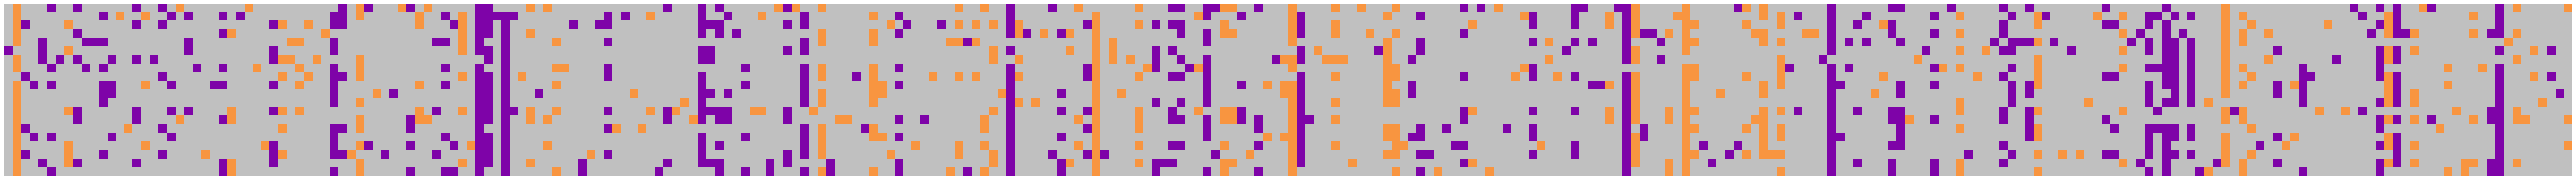

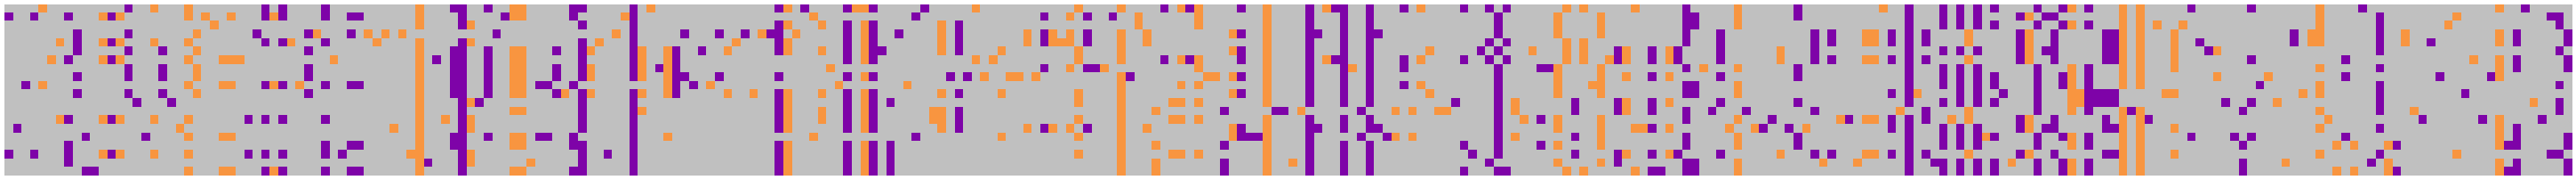

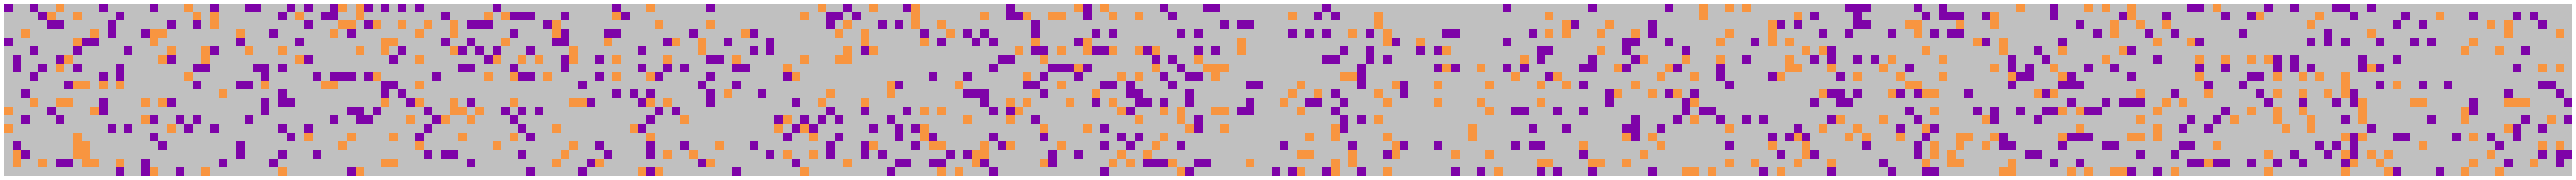

In [3]:
visualize_snp_tensor(test_dprime_scrambled_tensors[0])
visualize_snp_tensor(test_dprime_tensor[0])
visualize_snp_tensor(test_dprime_free_scrambled_tensors[0])

In [ ]:
pred = Dprime_model.predict(test_dprime_tensor, verbose=0) # JUST to visualize 5 predictions and true values
pred[0:5] 

print(f"{pred[0:5]}\n\n{test_dprime_label[0:5]}")



In [ ]:
"""
For the scramble test

1. Scramble test tensors
2. Predict on the scrambled test tensors
3. Use an algorithim to see if the new predictions list is the same as the previous predictions list

"""

import random

def scramble_list(input_list):
    # Use the random.shuffle function to shuffle the list in-place
    shuffled_list = input_list.copy()  # Create a copy to avoid modifying the original list
    random.shuffle(shuffled_list)

    return shuffled_list



test_dprime_scrambled_tensors = scramble_list(test_dprime_tensor) # SCRAMBLED TENSORS

print(f"Are the test input tensors equal?: {np.array_equal(test_dprime_scrambled_tensors, test_dprime_tensor)}\n")
pred_2 = Dprime_model.predict(test_dprime_scrambled_tensors, verbose=0) # Model's prediction with scrambled tensors
                                                 

print(f"Are both of the model's predictions the same?: {np.array_equal(pred, pred_2)}\n\n" ) # Printed false so that means it worked???? 
print(f"{pred[0:5]}\n\n{pred_2[0:5]}\n") # Also just to see the first 5 of each list
print(test_dprime_scrambled_tensors.shape)
print(test_dprime_tensor.shape)

In [ ]:
visualize_snp_tensor(test_dprime_scrambled_tensors[0])
visualize_snp_tensor(test_dprime_tensor[0])

In [ ]:
test_dprime_tensor[0][0:10][0] # First tensor, first to 10th row, first column

In [ ]:
import random
indr = 0
indc = 0
copy_tensors = test_dprime_tensor.copy()
for tensor in range(test_dprime_tensor.shape[0]):
    for row in range(test_dprime_tensor.shape[1]):
        rand_row = random.randint(0, test_dprime_tensor.shape[1])
        for column in range(test_dprime_label.shape[2]):
            rand_column = random.randint(0, test_dprime_tensor.shape[2])
            copy_tensors[tensor][rand_row][rand_column] = copy_tensors[tensor][indr][indc]
             






In [ ]:
def scramble_tensors(tensors):
    indr = 0
    indc = 0
    copy_tensors = tensors.copy()
    for tensor in range(copy_tensors.shape[0]):
        for row in range(copy_tensors.shape[1]):
            rand_row = random.randint(0, tensors.shape[1] - 1)
            for column in range(copy_tensors.shape[2]):
                rand_column = random.randint(0, copy_tensors.shape[2] - 1)
        copy_tensors[tensor][rand_row][rand_column] = copy_tensors[tensor][indr][indc]
        indr += 1
        indc += 1


    return copy_tensors

scramble_tensors(test_dprime_tensor)

In [ ]:
visualize_snp_tensor(copy_tensors[0])
visualize_snp_tensor(test_dprime_tensor[0])

In [ ]:
rmse = root_mean_squared_error(pred[:,0], test_dprime_label[:,0]) # A
print(f"Root Mean Squarred Error for A Parameter: {rmse}\n")

rmse = root_mean_squared_error(pred[:,1], test_dprime_label[:,1]) # B
print(f"Root Mean Squarred Error for B Parameter: {rmse}\n")

rmse = root_mean_squared_error(pred[:,2], test_dprime_label[:,2]) # C
print(f"Root Mean Squarred Error for C Parameter: {rmse}\n")

rmse = root_mean_squared_error(pred, test_dprime_label) # ALL
print(f"Root Mean Squarred Error for all Parameters: {rmse}")

In [ ]:
import matplotlib.pyplot as plt # A GRAPH

# Assuming test_dprime_label[:,0] and pred[:,0] are your actual and predicted values

plt.figure(figsize=(10, 10))

# Scatter plot with regular scales
plt.scatter(test_dprime_label[:,0], pred[:,0], c='crimson')

# Plotting the line of perfect predictions
p1 = max(max(pred[:,0]), max(test_dprime_label[:,0]))
p2 = min(min(pred[:,0]), min(test_dprime_label[:,0]))
plt.plot([p1, p2], [p1, p2], 'b-')

# Adding labels and equal axis
plt.xlabel('A True Values', fontsize=15)
plt.ylabel('A Predictions', fontsize=15)
plt.title("Dprime CNN True v Predictions A")
# Adding text annotation
plt.text(0.1, 0.9, 'RMSE: 0.13', transform=plt.gca().transAxes, fontsize=12, color='blue')

# Display the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt # B GRAPH

# Assuming test_dprime_label[:,1] and pred[:,1] are your actual and predicted values

plt.figure(figsize=(10, 10))

# Scatter plot with regular scales
plt.scatter(test_dprime_label[:,1], pred[:,1], c='crimson')

# Plotting the line of perfect predictions
p1 = max(max(pred[:,1]), max(test_dprime_label[:,1]))
p2 = min(min(pred[:,1]), min(test_dprime_label[:,1]))
plt.plot([p1, p2], [p1, p2], 'b-')

# Adding labels and equal axis
plt.xlabel('B True Values', fontsize=15)
plt.ylabel('B Predictions', fontsize=15)
plt.title("Dprime CNN True v Predictions B")
# Adding text annotation
plt.text(0.1, 0.9, 'RMSE: 0.06', transform=plt.gca().transAxes, fontsize=12, color='blue')

# Display the plot
plt.show()

In [ ]:
import matplotlib.pyplot as plt # C GRAPH

# Assuming test_dprime_label[:,2] and pred[:,2] are your actual and predicted values

plt.figure(figsize=(10, 10))

# Scatter plot with regular scales
plt.scatter(test_dprime_label[:,2], pred[:,2], c='crimson')

# Plotting the line of perfect predictions
p1 = max(max(pred[:,2]), max(test_dprime_label[:,2]))
p2 = min(min(pred[:,2]), min(test_dprime_label[:,2]))
plt.plot([p1, p2], [p1, p2], 'b-')

# Adding labels and equal axis
plt.xlabel('C True Values', fontsize=15)
plt.ylabel('C Predictions', fontsize=15)
plt.title("Dprime CNN True v Predictions C")
# Adding text annotation
plt.text(0.1, 0.9, 'RMSE: 0.009', transform=plt.gca().transAxes, fontsize=12, color='blue')

# Display the plot
plt.show()